## Shallow Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers


class ShallowNN(tf.keras.Model):
    def __init__(self, vocab_size, emb_dim=50, input_length=128, FFN_units=32,
                nb_classes=2, dropout_rate=0.1,
                training=False, name="shallow"):
        super(ShallowNN, self).__init__(name=name)
        self.embedding = layers.Embedding(vocab_size, emb_dim, input_length=input_length)
        self.pool = layers.GlobalAveragePooling1D()
        self.dense = layers.Dense(FFN_units, activation='relu')
        self.dropout = layers.Dropout(rate=dropout_rate)
        if nb_classes == 2:
            self.last_dense = layers.Dense(units=1, activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=nb_classes, activation="softmax")

    def call(self, inputs, training):
        print('one sample of input signal', inputs[0])
        embs = self.embedding(inputs)
        print('one embedding layer output', embs[0])
        print('embedding layer', embs.shape)
        x = self.dropout(embs, training=training)
        print('dropout 1', x.shape)
        x = self.pool(x)
        print(x[0])
        print('pooling layer', x.shape)
        x = self.dropout(x, training=training)
        print('dropout 2', x.shape)
        x = self.dense(x)
        print('dense layer', x.shape)
        x = self.dropout(x, training=training)
        print('dropout 3', x.shape)
        output = self.last_dense(x)

        return output

In [ ]:
model = ShallowNN(20, emb_dim=2, input_length=3, FFN_units=8, nb_classes=2)
model.build([10, 3])
print(model.summary())

one sample of input signal Tensor("strided_slice:0", shape=(3,), dtype=float32)
one embedding layer output Tensor("strided_slice_1:0", shape=(3, 2), dtype=float32)
embedding layer (10, 3, 2)
dropout 1 (10, 3, 2)
Tensor("strided_slice_2:0", shape=(2,), dtype=float32)
pooling layer (10, 2)
dropout 2 (10, 2)
dense layer (10, 8)
dropout 3 (10, 8)
Model: "shallow"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  40        
_________________________________________________________________
global_average_pooling1d (Gl multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  24        
_________________________________________________________________
dropout (Dropout)            multiple                  0         
____________________________________________

In [ ]:
import numpy as np

inputs = np.random.randint(0, high=20, size=(10, 3))
out = model(inputs)
print("*"*10)
print('model output', out)
print('output shape', out.shape)

one sample of input signal tf.Tensor([12  6 11], shape=(3,), dtype=int64)
one embedding layer output tf.Tensor(
[[ 0.0410685   0.00705718]
 [ 0.03380862  0.00404817]
 [-0.00746311 -0.0142974 ]], shape=(3, 2), dtype=float32)
embedding layer (10, 3, 2)
dropout 1 (10, 3, 2)
tf.Tensor([ 0.02247134 -0.00106402], shape=(2,), dtype=float32)
pooling layer (10, 2)
dropout 2 (10, 2)
dense layer (10, 8)
dropout 3 (10, 8)
**********
model output tf.Tensor(
[[0.49953666]
 [0.5011486 ]
 [0.5001864 ]
 [0.49998492]
 [0.5000969 ]
 [0.4996887 ]
 [0.5011825 ]
 [0.49946228]
 [0.49987358]
 [0.50227207]], shape=(10, 1), dtype=float32)
output shape (10, 1)


## Convolutional Neural Networks

### convolution example

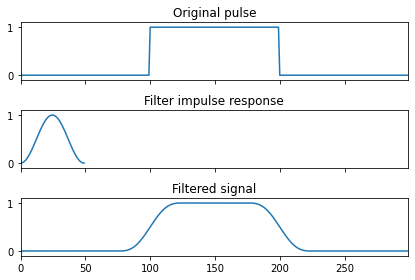

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

sig = np.repeat([0., 1., 0.], 100)
win = signal.windows.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
# plt.savefig('output/graph.png')
plt.show()

### tf.keras.layers.Conv1D layer

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

## The inputs are 2-length vectors with 4 timesteps, and the batch size is 1
input_shape = (1, 4, 2)
x = tf.random.normal(input_shape)

## there are going to be 5 filters with kernel size is 3
conv_layer = tf.keras.layers.Conv1D(5, 3, activation='relu',input_shape=input_shape[1:])
y = conv_layer(x)
print('input vector', x)
print('output vector', y)
print('weights', conv_layer.weights[0])

input vector tf.Tensor(
[[[ 0.3274685 -0.8426258]
  [ 0.3194337 -1.4075519]
  [-2.3880599 -1.0392479]
  [-0.5573232  0.539707 ]]], shape=(1, 4, 2), dtype=float32)
output vector tf.Tensor(
[[[0.         0.7420608  0.         0.         0.        ]
  [0.         0.         1.2456826  0.04663306 0.        ]]], shape=(1, 2, 5), dtype=float32)
weights <tf.Variable 'conv1d/kernel:0' shape=(3, 2, 5) dtype=float32, numpy=
array([[[ 0.2008642 , -0.0165928 ,  0.46075237, -0.26492321,
          0.247114  ],
        [ 0.4196731 ,  0.47759396,  0.26654935, -0.16115183,
          0.05044025]],

       [[-0.25485608,  0.21096879, -0.4066371 ,  0.03724921,
          0.22973436],
        [ 0.40091085, -0.17139468, -0.34874785, -0.06216273,
          0.42850113]],

       [[-0.38695297, -0.40390682,  0.0806585 ,  0.47221655,
          0.44756472],
        [ 0.10378796,  0.11860859,  0.34301662,  0.35566896,
          0.41862184]]], dtype=float32)>


In [ ]:
print(
  (0.3274685 * -0.0165928  + -0.8426258 * 0.47759396) + 
  (0.3194337 * 0.21096879 + -1.4075519 * -0.17139468) + 
  (-2.3880599 * -0.40390682 + -1.0392479 * 0.11860859)
)

0.7420607888102042


### Model Implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)


class ConvNN(tf.keras.Model):
    def __init__(self, vocab_size, emb_dim=50, FFN_units=32,
                 nfilters=100, nb_classes=2,
                 dropout_rate=0.2, training=False, name="conv"):
        super(ConvNN, self).__init__(name=name)
        self.embedding = layers.Embedding(vocab_size, emb_dim, trainable=False)
        self.conv = layers.Conv1D(nfilters, 3, activation='relu')
        self.pool = layers.GlobalMaxPooling1D()
        self.dense = layers.Dense(FFN_units, activation='relu')
        self.dropout = layers.Dropout(rate=dropout_rate)
        if nb_classes == 2:
            self.last_dense = layers.Dense(units=1, activation="sigmoid")
        else:
            self.last_dense = layers.Dense(
                units=nb_classes, activation="softmax")

    def call(self, inputs, training):
        print('one sample of input signal', inputs[0])
        embs = self.embedding(inputs)
        print('one embedding layer output', embs[0])
        print('embedding layer', embs.shape)
        x = self.conv(embs)
        print('feature vectors for the different filters', x)
        print('shape after the conv layer', x.shape)
        x = self.pool(x)
        print(x[0])
        print('pooling layer', x.shape)
        x = self.dropout(x, training=training)
        print('dropout 2', x.shape)
        x = self.dense(x)
        print('dense layer', x.shape)
        x = self.dropout(x, training=training)
        print('dropout 3', x.shape)
        output = self.last_dense(x)

        return output

In [ ]:
model = ConvNN(20, emb_dim=2, FFN_units=8, nfilters=5, nb_classes=2)
model.build([10, 4])
print(model.summary())

one sample of input signal Tensor("strided_slice:0", shape=(4,), dtype=float32)
one embedding layer output Tensor("strided_slice_1:0", shape=(4, 2), dtype=float32)
embedding layer (10, 4, 2)
feature vectors for the different filters Tensor("conv1d_1/Relu:0", shape=(10, 2, 5), dtype=float32)
shape after the conv layer (10, 2, 5)
Tensor("strided_slice_2:0", shape=(5,), dtype=float32)
pooling layer (10, 5)
dropout 2 (10, 5)
dense layer (10, 8)
dropout 3 (10, 8)
Model: "conv"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      multiple                  40        
_________________________________________________________________
conv1d_1 (Conv1D)            multiple                  35        
_________________________________________________________________
global_max_pooling1d (Global multiple                  0         
_____________________________________________________________